# 分类评估指标

## 学习目标

- 理解混淆矩阵的含义和计算方法
- 掌握分类评估指标：准确率、精确率、召回率、F1分数
- 理解ROC曲线和AUC的含义
- 学会根据业务需求选择合适的评估指标和阈值

## 课程概述

本Notebook将带你全面学习分类模型的评估方法。我们将从混淆矩阵开始，逐步学习各种评估指标，并通过可视化来直观理解这些指标的含义。

**学习路径**：
1. 混淆矩阵基础
2. 基本评估指标计算
3. ROC曲线和AUC
4. 分类报告
5. 阈值选择的影响


In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, roc_curve, auc, classification_report)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置随机种子，确保结果可复现
np.random.seed(42)

# 设置图表样式
plt.style.use('seaborn-v0_8-darkgrid')
print("环境准备完成！")


环境准备完成！


## 理论回顾

### 混淆矩阵（Confusion Matrix）

混淆矩阵是评估分类模型性能的基础工具，它展示了模型预测结果与真实标签的对应关系：

|            | 预测正例 | 预测负例 |
|-----------|---------|---------|
| **实际正例** | TP (真正例) | FN (假负例) |
| **实际负例** | FP (假正例) | TN (真负例) |

**关键概念**：
- **TP (True Positive)**：真正例，预测为正，实际为正 ✅
- **TN (True Negative)**：真负例，预测为负，实际为负 ✅
- **FP (False Positive)**：假正例，预测为正，实际为负 ❌（误报）
- **FN (False Negative)**：假负例，预测为负，实际为正 ❌（漏报）

### 评估指标

1. **准确率 (Accuracy)**：所有预测正确的比例
   $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

2. **精确率 (Precision)**：预测为正例中真正为正例的比例
   $$Precision = \frac{TP}{TP + FP}$$

3. **召回率 (Recall)**：实际正例中被正确预测的比例
   $$Recall = \frac{TP}{TP + FN}$$

4. **F1分数 (F1-Score)**：精确率和召回率的调和平均
   $$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

### ROC曲线和AUC

- **ROC曲线**：以假正例率(FPR)为横轴，真正例率(TPR)为纵轴的曲线
- **AUC**：ROC曲线下的面积，值越大越好（范围：0.5-1.0）


## 1. 数据准备

首先生成分类数据并训练一个简单的模型，用于后续的评估演示。


In [2]:
# 生成分类数据
# n_samples: 样本数量
# n_features: 特征数量
# n_informative: 有信息的特征数量
# n_redundant: 冗余特征数量
# n_classes: 类别数量
# random_state: 随机种子，确保结果可复现
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                          n_redundant=5, n_classes=2, random_state=42)

# 划分训练集和测试集
# test_size: 测试集比例（20%）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 60)
print("数据信息")
print("=" * 60)
print(f"训练集样本数: {len(X_train)}")
print(f"测试集样本数: {len(X_test)}")
print(f"特征数: {X.shape[1]}")
print(f"类别数: {len(np.unique(y))}")

# 训练逻辑回归模型
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)  # 类别预测（0或1）
y_pred_proba = model.predict_proba(X_test)[:, 1]  # 正类的概率（0-1之间）

print("\n模型训练完成！")


数据信息
训练集样本数: 800
测试集样本数: 200
特征数: 20
类别数: 2

模型训练完成！


## 2. 混淆矩阵

混淆矩阵是评估分类模型的基础，让我们先计算并可视化混淆矩阵。


混淆矩阵

混淆矩阵数值:
               预测正例    预测负例
实际正例         80        18
实际负例         23        79

详细统计:
  TP (真正例): 80 - 预测为正，实际为正 ✅
  TN (真负例): 79 - 预测为负，实际为负 ✅
  FP (假正例): 23 - 预测为正，实际为负 ❌ (误报)
  FN (假负例): 18 - 预测为负，实际为正 ❌ (漏报)


C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\3110029407.py:41: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\3110029407.py:41: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\3110029407.py:41: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\3110029407.py:41: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\3110029407.py:41: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\3110029407.py:41: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807})

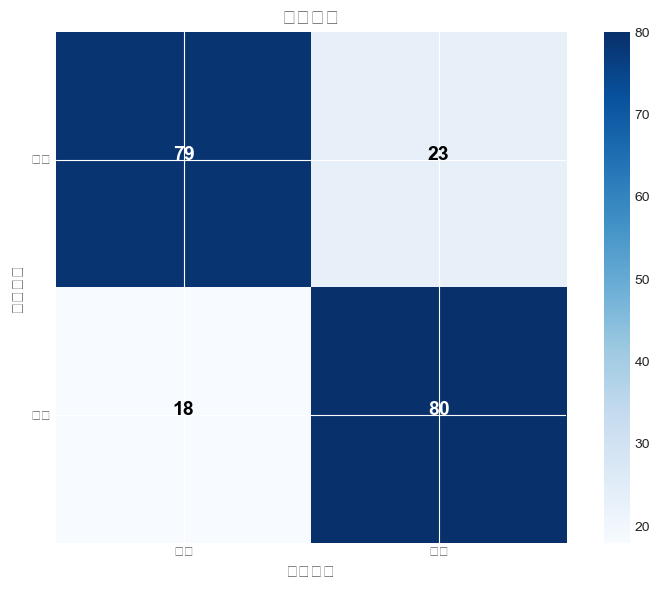

In [3]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 提取TP, TN, FP, FN
# cm.ravel()将2x2矩阵展平为一维数组：[TN, FP, FN, TP]
tn, fp, fn, tp = cm.ravel()

print("=" * 60)
print("混淆矩阵")
print("=" * 60)
print(f"\n混淆矩阵数值:")
print(f"               预测正例    预测负例")
print(f"实际正例       {tp:4d}      {fn:4d}")
print(f"实际负例       {fp:4d}      {tn:4d}")

print(f"\n详细统计:")
print(f"  TP (真正例): {tp} - 预测为正，实际为正 ✅")
print(f"  TN (真负例): {tn} - 预测为负，实际为负 ✅")
print(f"  FP (假正例): {fp} - 预测为正，实际为负 ❌ (误报)")
print(f"  FN (假负例): {fn} - 预测为负，实际为正 ❌ (漏报)")

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('混淆矩阵', fontsize=14, fontweight='bold')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['负例', '正例'])
plt.yticks(tick_marks, ['负例', '正例'])
plt.ylabel('真实标签', fontsize=12)
plt.xlabel('预测标签', fontsize=12)

# 添加数值标签
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black",
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 3. 基本评估指标

基于混淆矩阵，我们可以计算各种评估指标。


In [4]:
# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=" * 60)
print("评估指标")
print("=" * 60)
print(f"\n评估指标结果:")
print(f"  准确率 (Accuracy):  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  精确率 (Precision): {precision:.4f} ({precision*100:.2f}%)")
print(f"  召回率 (Recall):    {recall:.4f} ({recall*100:.2f}%)")
print(f"  F1分数 (F1-Score):  {f1:.4f} ({f1*100:.2f}%)")

# 手动计算验证（帮助理解公式）
print(f"\n手动计算验证:")
print(f"  准确率 = (TP + TN) / (TP + TN + FP + FN)")
print(f"         = ({tp} + {tn}) / ({tp} + {tn} + {fp} + {fn})")
print(f"         = {tp + tn} / {tp + tn + fp + fn} = {accuracy:.4f}")

print(f"\n  精确率 = TP / (TP + FP)")
print(f"         = {tp} / ({tp} + {fp})")
print(f"         = {tp} / {tp + fp} = {precision:.4f}")

print(f"\n  召回率 = TP / (TP + FN)")
print(f"         = {tp} / ({tp} + {fn})")
print(f"         = {tp} / {tp + fn} = {recall:.4f}")

print(f"\n  F1分数 = 2 × (Precision × Recall) / (Precision + Recall)")
print(f"         = 2 × ({precision:.4f} × {recall:.4f}) / ({precision:.4f} + {recall:.4f})")
print(f"         = {f1:.4f}")


评估指标

评估指标结果:
  准确率 (Accuracy):  0.7950 (79.50%)
  精确率 (Precision): 0.7767 (77.67%)
  召回率 (Recall):    0.8163 (81.63%)
  F1分数 (F1-Score):  0.7960 (79.60%)

手动计算验证:
  准确率 = (TP + TN) / (TP + TN + FP + FN)
         = (80 + 79) / (80 + 79 + 23 + 18)
         = 159 / 200 = 0.7950

  精确率 = TP / (TP + FP)
         = 80 / (80 + 23)
         = 80 / 103 = 0.7767

  召回率 = TP / (TP + FN)
         = 80 / (80 + 18)
         = 80 / 98 = 0.8163

  F1分数 = 2 × (Precision × Recall) / (Precision + Recall)
         = 2 × (0.7767 × 0.8163) / (0.7767 + 0.8163)
         = 0.7960


## 4. ROC曲线和AUC

ROC曲线展示了不同阈值下真正例率(TPR)和假正例率(FPR)的关系。AUC值越大，模型性能越好。


ROC曲线和AUC

ROC曲线统计:
  AUC: 0.8924
  AUC解释: 良好


C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\521394597.py:28: UserWarning: Glyph 20551 (\N{CJK UNIFIED IDEOGRAPH-5047}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\521394597.py:28: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\521394597.py:28: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\521394597.py:28: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\521394597.py:28: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\521394597.py:28: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missi

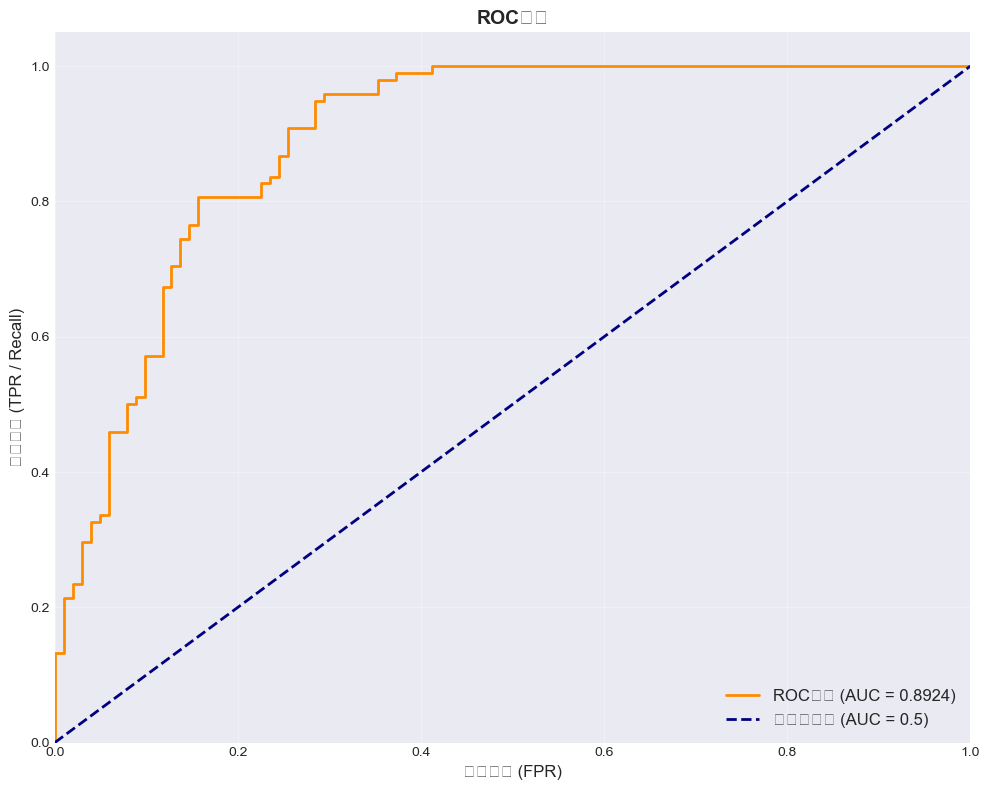


ROC曲线说明:
- 横轴(FPR): 假正例率，越小越好
- 纵轴(TPR): 真正例率（召回率），越大越好
- 对角线: 随机分类器的性能（AUC=0.5）
- 曲线越靠近左上角，模型性能越好


In [5]:
# 计算ROC曲线
# fpr: 假正例率 (False Positive Rate) = FP / (FP + TN)
# tpr: 真正例率 (True Positive Rate) = TP / (TP + FN) = Recall
# thresholds: 阈值
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("=" * 60)
print("ROC曲线和AUC")
print("=" * 60)
print(f"\nROC曲线统计:")
print(f"  AUC: {roc_auc:.4f}")
print(f"  AUC解释: {'优秀' if roc_auc > 0.9 else '良好' if roc_auc > 0.8 else '一般' if roc_auc > 0.7 else '较差'}")

# 可视化ROC曲线
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC曲线 (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='随机分类器 (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正例率 (FPR)', fontsize=12)
plt.ylabel('真正例率 (TPR / Recall)', fontsize=12)
plt.title('ROC曲线', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nROC曲线说明:")
print("- 横轴(FPR): 假正例率，越小越好")
print("- 纵轴(TPR): 真正例率（召回率），越大越好")
print("- 对角线: 随机分类器的性能（AUC=0.5）")
print("- 曲线越靠近左上角，模型性能越好")


## 5. 分类报告

使用scikit-learn的classification_report可以快速生成详细的分类报告。


In [6]:
# 生成分类报告
# target_names: 类别名称
report = classification_report(y_test, y_pred, target_names=['负例', '正例'])

print("=" * 60)
print("分类报告")
print("=" * 60)
print("\n" + report)

print("\n报告说明:")
print("- precision: 精确率")
print("- recall: 召回率")
print("- f1-score: F1分数")
print("- support: 该类别在测试集中的样本数量")
print("- accuracy: 整体准确率")
print("- macro avg: 宏平均（各类别指标的平均值）")
print("- weighted avg: 加权平均（按样本数量加权）")


分类报告

              precision    recall  f1-score   support

          负例       0.81      0.77      0.79       102
          正例       0.78      0.82      0.80        98

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200


报告说明:
- precision: 精确率
- recall: 召回率
- f1-score: F1分数
- support: 该类别在测试集中的样本数量
- accuracy: 整体准确率
- macro avg: 宏平均（各类别指标的平均值）
- weighted avg: 加权平均（按样本数量加权）


## 6. 不同阈值的影响

分类阈值的选择会影响精确率和召回率。让我们看看不同阈值下的性能变化。


C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\236190418.py:26: UserWarning: Glyph 38408 (\N{CJK UNIFIED IDEOGRAPH-9608}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\236190418.py:26: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\236190418.py:26: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\236190418.py:26: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\236190418.py:26: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_44512\236190418.py:26: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missi

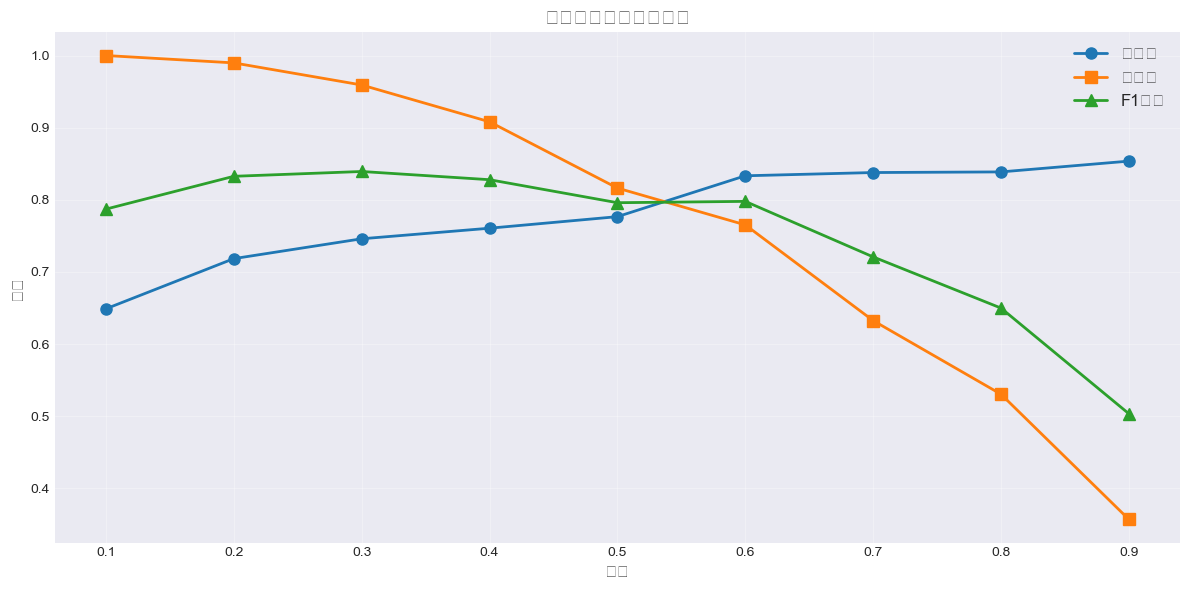

阈值分析

阈值选择的影响:
- 提高阈值（如0.7-0.9）: 精确率提高，召回率降低
  → 适合：误报成本高的场景（如垃圾邮件检测）
- 降低阈值（如0.1-0.3）: 精确率降低，召回率提高
  → 适合：漏报成本高的场景（如疾病诊断）
- 默认阈值（0.5）: 平衡精确率和召回率
  → 适合：一般分类任务

最佳F1分数: 0.8393 (阈值: 0.3)


In [7]:
# 测试不同阈值
thresholds = np.arange(0.1, 1.0, 0.1)  # 从0.1到0.9，步长0.1
precisions = []
recalls = []
f1_scores = []

# 对每个阈值计算评估指标
for threshold in thresholds:
    # 根据阈值将概率转换为类别预测
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# 可视化不同阈值下的指标变化
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precisions, marker='o', label='精确率', linewidth=2, markersize=8)
plt.plot(thresholds, recalls, marker='s', label='召回率', linewidth=2, markersize=8)
plt.plot(thresholds, f1_scores, marker='^', label='F1分数', linewidth=2, markersize=8)
plt.xlabel('阈值', fontsize=12)
plt.ylabel('分数', fontsize=12)
plt.title('不同阈值下的评估指标', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(thresholds)
plt.tight_layout()
plt.show()

print("=" * 60)
print("阈值分析")
print("=" * 60)
print("\n阈值选择的影响:")
print("- 提高阈值（如0.7-0.9）: 精确率提高，召回率降低")
print("  → 适合：误报成本高的场景（如垃圾邮件检测）")
print("- 降低阈值（如0.1-0.3）: 精确率降低，召回率提高")
print("  → 适合：漏报成本高的场景（如疾病诊断）")
print("- 默认阈值（0.5）: 平衡精确率和召回率")
print("  → 适合：一般分类任务")

# 找到最佳F1分数对应的阈值
best_f1_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_idx]
best_f1 = f1_scores[best_f1_idx]

print(f"\n最佳F1分数: {best_f1:.4f} (阈值: {best_threshold:.1f})")


## 总结与思考

### 关键知识点回顾

1. **混淆矩阵**：评估分类模型的基础，展示了预测结果与真实标签的对应关系
2. **评估指标**：
   - 准确率：整体预测正确的比例
   - 精确率：预测为正例中真正为正例的比例
   - 召回率：实际正例中被正确预测的比例
   - F1分数：精确率和召回率的调和平均
3. **ROC曲线和AUC**：评估分类性能的重要工具，AUC值越大越好
4. **阈值选择**：根据业务需求选择合适的阈值，平衡精确率和召回率

### 思考问题

1. **什么时候使用精确率？什么时候使用召回率？**
   - 精确率：关注误报成本（如垃圾邮件检测）
   - 召回率：关注漏报成本（如疾病诊断）

2. **如何选择合适的评估指标？**
   - 类别平衡：使用准确率
   - 类别不平衡：使用精确率、召回率、F1分数
   - 需要概率评估：使用ROC-AUC

3. **如何根据业务需求选择阈值？**
   - 误报成本高：提高阈值（提高精确率）
   - 漏报成本高：降低阈值（提高召回率）
   - 平衡需求：选择F1分数最高的阈值

### 下一步学习

- 学习回归评估指标（MSE、RMSE、MAE、R²）
- 学习交叉验证方法
- 学习超参数调优
- 学习特征选择方法
